In [2]:
import numpy as np
import sympy as sp

# Sampling Distributions from the Normal Distribution

So we have done the hardwork. We now understand how to take a sample from a known distribution, compute statistics from it and then derive densities and distributions describing them directly. This is, the key idea that will drive much of what we do for the rest of the semester. So now it is time to start cashing in on it. 

What we will see next week is the normal distribution is particularly special, so it is worth taking some time and describing carefully the consequences of the results from the last week in this specific context.

## The Mean of a Sample of the Normal Distribution

The obvious place to start is the mean. Let $Y_1, Y_2, \dots, Y_n$ be a random sample of size $n$ from a normal distribution with mean $\mu$ and variance $\sigma^2$. Define the statistic the mean of this sample:

$$\bar{Y} = \frac{1}{n} \sum_{i=1}^n Y_i $$ 

What is the $$\mu_{\bar{Y}} = E(\bar{Y}) $$ and $$ \sigma_{\bar{Y}}^2 = V(\bar{Y})$$


We showed

$$ \mu_{\bar{Y}} = E(\bar{Y}) = \mu $$

and

$$ \sigma_{\bar{Y}}^2 = V(\bar{Y}) = \frac{\sigma^2}{n}   $$

## The Distribution of $\bar{Y}$ 

We will show that $\bar{Y}$ is a normally distributed random variable with mean $\mu$ and variance $\sigma^2/n$. In fact more generally we will show that any linear combination of independent normal random variables is itself a normal random variable. This can be done efficiently by the method of generating functions and using the independece of the random variables. Let:

$$ U = a_1 Y_1 + a_2 Y_2 + \dots + a_n Y_n$$ 

We note that the moment generating function of the $Y_i$ is:

$$m_{Y_i}(t) = e^{\mu_i t + \sigma_i^2 t^2 /2} $$

We then note that the 

$$ m_{a_i Y_i}(t) = E( e^{t a_i Y_i} ) = m_{Y_i}( a_i t) $$

by just passing the parameter from the random variable to the argument.

Finally we note that 

$$ m_{a_i Y_i + a_j Y_j }(t) = E( e^{t a_i Y_i + t a_j Y_j} ) = m_{Y_i}(a_i t) m_{Y_j}(a_j t) $$

and putting it all together we have:

$$ m_{U}(t) = e^{ t \sum a_i \mu_i + t^2/2 \sum a_i^2 \sigma_i^2 } $$

And so $U$ is normally distributed with mean $\sum a_i \mu_i$ and variance $\sum a_i^2 \sigma_i^2 $

### Example

A bar owner is wondering how much whiskey their bartenders use in making drinks. Assuming that the amount used is a normally distributed random varialbe with mean $\mu$, and that we know the standard deviation in pours is 1 ounce. What the owner does is use a bottle meter to track how much is used. How many observations should be collected if we wish the mean of the sample to be with 0.1 ounces of $\mu$ with probability 0.95?

$$ Z = \frac{ (\bar{Y} - \mu) }{\sigma_{\bar{Y}}} $$  

$Z$ will be a standard normal random variable.

We want the interval for $Z$ overwhich the standard normal random variable should appear 95% of the time.

In [5]:
from scipy.stats import norm

# inverse of the cummulative density
norm.ppf(0.95)

1.6448536269514722

In [8]:
# area under the density between -1.645 and 1.645

norm.cdf(1.645) - norm.cdf(-1.645)

0.9000301889217572

In [9]:
# inverse of the cummulative density for 0.975

norm.ppf(0.975)

1.959963984540054

In [10]:
# area undere the density between -1.96 and 1.96
norm.cdf(1.96) - norm.cdf(-1.96)

0.950004209703559

In [ ]:
# So we want -1.96 < Z < 1.96

So we find that we want $-1.96 < Z < 1.96$

Working backwards we get:

$$ -1.96 \sigma_{\bar{Y}} < \bar{Y} - \mu < 1.96 \sigma_{\bar{Y}} $$

Using that $\sigma_{\bar{Y}}^2 = \sigma^2 / n$ we get

$$ -1.96 \sigma / \sqrt{n} < \bar{Y} - \mu < 1.96 \sigma / \sqrt{n} $$


So what we want is that $1.96 / \sqrt{n} < 0.1$

Solving this inequality for $n$ we get:

In [16]:
# n is bigger than

(1.96/0.1)**2

384.1599999999999

## Squares of a Normal Sample

Let $Z_1, Z_2, \dots, Z_n$ be a sample of n values from the standard normal distribution. Then 

$$\sum Z_i^2 $$ 

has what is called a $\chi^2$ distribution with $n$ degrees of freedom. 

The density is given by:

$$ f(y) = \frac{y^{n/2 - 1} e^{-y/2} }{2^{n/2} \Gamma(n/2) } $$

Why would we be interested in such a result?

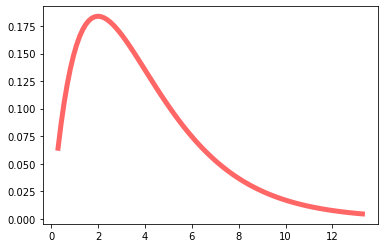

In [17]:
from scipy.stats import chi2
import matplotlib.pyplot as plt

df = 4
x = np.linspace(chi2.ppf(0.01, df),
                chi2.ppf(0.99, df), 100)
plt.plot(x, chi2.pdf(x, df),
       'r-', lw=5, alpha=0.6, label='chi2 pdf')

### Mean and Variance of the $\chi^2$ distribution

The mean of the $\chi^2$ distribution is n; and the variance is $2 n$.

## Estimating the Variance from a Sample

So as you noted, the reason we might want to know what the distribution of $\sum Z_i^2$ is, is that we might be computing the variance of a population from a random sample.

Suppose for example the $Y_1, Y_2, \dots Y_n$ is a sample from a normal distribution with an unknown mean $\mu$ and unkknown variance $\sigma^2$. 

You see the problem?  In order to estimate how good $\bar{Y}$ is at predicting $\mu$, we need to know $\sigma$. But unless we have already studied this population how can we find $\sigma$?

Let $$ S^2 = \frac{1}{n-1} \sum_{i=1}^n (Y_i - \bar{Y})^2 $$

(side note - the $n-1$ here is annoying. The idea is that we should divide by the number of degrees of freedom, and because we are computing $\bar{Y}$ from the same sample we have used one degree of freedom already. I know. I know. **Think about what this means when n=1.  Surely $S^2 = 0$ is not a good estimate for the variance.**

The result is then that 

$$ \frac{ (n-1) S^2 }{\sigma^2} = \frac{1}{\sigma^2} \sum (Y_i - \bar{Y})^2 $$

has a $\chi^2$ distribution with $n-1$ degrees of freedom. 

Let's do the proof when $n=2$. Substitute in for $\bar{Y}$ and you see where the $n-1$ comes from at least in this case.


### Furthermore

The $S^2$ and $\bar{Y}$ turn out to also be independent random variables.

## Summing Up

So again we have seen that if we know $\sigma$ then we can understand our $\bar{Y}$ as an estimate for $\mu$ by using the result that 

$$Z =  \sqrt{n} (\bar{Y} - \mu) / \sigma  $$ 

has a *Standard Normal Distribution*.  However this means we must be studying a population for which we know $\sigma$. 

We can now consider the random variable found by replacing the $\sigma$ above with our estimate $S$.  Remember $S$ is itself a random variable, so while this will give us something it would be shocking if it was normal:

The variable:

$$ T = \sqrt{n} \left( \frac{\bar{Y} - \mu}{S} \right) $$ 

satisfies a dsitribution named *Student's t distribution* with $n-1$ degrees of freedom. Students t distribution is dfined to be the result just this combination of distributions. 

This thing is a pain to use the way we have been doing distributions so far and it is just not worth it. So let's introduce the scipy distribution packages. [https://docs.scipy.org/doc/scipy/reference/stats.html](https://docs.scipy.org/doc/scipy/reference/stats.html).

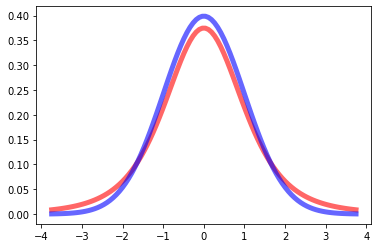

In [22]:
from scipy.stats import t
from scipy.stats import norm

df = 4
x = np.linspace(t.ppf(0.01, df),
                t.ppf(0.99, df), 100)
plt.plot(x, t.pdf(x, df),
       'r-', lw=5, alpha=0.6, label='t pdf')
plt.plot(x, norm.pdf(x), 
         'b-', lw=5, alpha =0.6 )

### An example to cut our teeth with

We have the weight of five high school wrestlers:  150, 152, 155, 155, and 160. Assuming that these are sampled from a normal distirbution with unkown mean $\mu$ and unkown variance $\sigma$. Let's use use the students $T$ distribution to find an interval about $\bar{Y}$ where we are 90% certain $\mu$ is located. 

## Comparing two variances

Suppose that $W_1$ and $W_2$ are to indepdent $\chi^2$-distributed random variables with $\nu_1$ and $\nu_2$ degrees of freedom. Then 

$$ F = \frac{ W_1/\nu_1}{W_2 / \nu_2} $$ is said to have an F distribution with $\nu_1$ numerator degrees of freedom and $\nu_2$ denomoninator degrees of freedom. 

In practice this is used by connecting it back to the sample and population variances, the ration of which is the respective $W_i/\nu_i$ in this result.

### Example 

Show that if we take independent samples of size $n_1 = 4$ and $n_2 = 8$ from two normal populations with the same variance, then find the upper bound $b$ such that 

$$ P( \frac{S_1^2}{S_2^2} < b ) = 0.95 $$